In [34]:
import gdown
import os
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import cv2  


name='facesdetection'
os.mkdir('/content/'+name)
os.chdir('/content/'+name)
!gdown 'https://drive.google.com/uc?id=1NiTKjPdq46YaODqKk1WL0oGMig1EtrPK'
!tar -zxvf faces.tar.gz

In [2]:
source_path_train='/content/'+name+'/'
names=['face.test.tar.gz','face.train.tar.gz']

for name in names:
  with tarfile.open(source_path_train+name) as tar:
    tar.extractall()

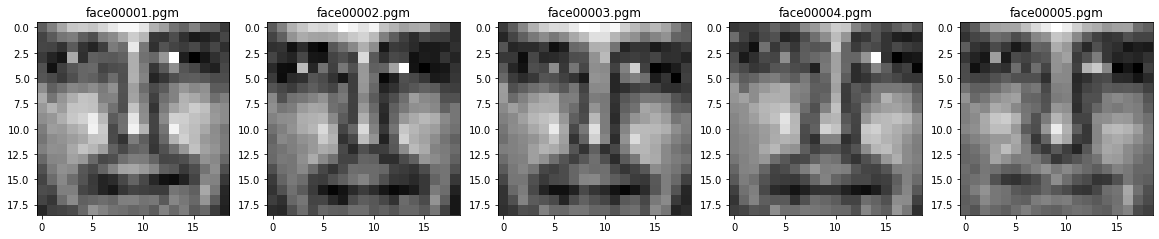

In [3]:
train_name='train'
name='facesdetection'
path='/content/'+name+'/'+train_name+'/'+'face'+'/'
path_nonface='/content/'+name+'/'+train_name+'/'+'non-face'+'/'

face_train_names=sorted(os.listdir(path))
non_face_train_names=sorted(os.listdir(path_nonface))

_, axs = plt.subplots(1, 5, figsize=(20, 20))
axs = axs.flatten()

import cv2
for name,ax in zip(face_train_names[:5],axs):
  ax.imshow(cv2.imread(path+name, cv2.IMREAD_GRAYSCALE), cmap='gray')
  ax.set_title(name)
plt.show()

In [4]:
def normalize(dataset):
  std = np.std(dataset.reshape(dataset.shape[0], -1), axis=1)
  mean = np.mean(dataset.reshape(dataset.shape[0], -1), axis=1)
  for i in range(len(std)):
    dataset[i] = (dataset[i] - mean[i]) / std[i]
  return dataset

In [5]:
def standartization(names,path):
   A=np.zeros((len(names),19,19))
   for i,name in enumerate(names):
     data=cv2.imread(path+name,cv2.IMREAD_GRAYSCALE)
     A[i,:,:]=normalize(data)
   return A

In [7]:
path_face=path
path_nonface='/content/facesdetection/'+train_name+'/'+'non-face'+'/'

faces_stand=standartization(face_train_names,path=path_face) # с лицами
non_faces_stand=standartization(non_face_train_names,path=path_nonface) # без лиц

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [ ]:
_, axs = plt.subplots(1, 5, figsize=(20, 20))
axs = axs.flatten()

for image,ax,name in zip(faces_stand[:5],axs,face_train_names[:5]):
  ax.imshow(image,cmap='gray') 
  ax.set_title(name)
plt.show()

In [9]:
def integral_image(faces,N):
  B=np.zeros((N,20,20))
  for i,image in enumerate(faces):
    rows,cols=image.shape 
    sum = np.zeros((rows,cols),np.int32)  
    imageIntegral = cv2.integral(image, sum,-1)  
    B[i,:,:]= imageIntegral
  return B

In [ ]:
integ_image=integral_image(faces_stand,N)
non_integ_image=integral_image(non_faces_stand,N)

In [11]:
#_, axs = plt.subplots(1, 5, figsize=(20, 20))
#axs = axs.flatten()

#for image,ax,name in zip(integ_image[:5],axs,face_train_names[:5]):
#  ax.imshow(image,cmap='gray') 
#  ax.set_title(name)
#plt.show()

In [12]:
#train
os.mkdir('/content/faces_train')
os.mkdir('/content/faces_train/face')
#train non-face
os.mkdir('/content/faces_train/non_face')

# сохранить как .bmp
def save_bmp(faces,path):
  for i,image in enumerate(faces):
    cv2.imwrite(path+'/'+'pict{}.bmp'.format(i),image)
  print('сохранено в '+path)

In [13]:

def save_bmp_on(faces,path,path_in):
  for i,image in enumerate(faces):
    data=cv2.imread(path_in+image, cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(path+'/'+'pict{}.bmp'.format(i),data)
  print('сохранено в '+path)

In [ ]:
path_in='/content/facesdetection/train/face/'
path='/content/faces_train/face'
faces=os.listdir(path_in)
save_bmp_on(faces,path,path_in)
#
path_in='/content/facesdetection/train/non-face/'
path='/content/faces_train/non_face'
faces=os.listdir(path_in)
save_bmp_on(faces,path,path_in)

In [ ]:
path='/content/faces_train/face'
save_bmp(faces_stand,path)
path='/content/faces_train/non_face'
save_bmp(non_faces_stand,path)

In [15]:
#_, axs = plt.subplots(1, 5, figsize=(20, 20))
#axs = axs.flatten()
#path='/content/faces_train/face'
#for i,ax,name in zip(range(5),axs,face_train_names[:5]):
#  ax.imshow(cv2.imread(path+'/'+'pict{}.bmp'.format(i))) 
#  ax.set_title(name)
#plt.show()

In [16]:
attribute=' 1  0 0 14 14'
string_face='\n'.join(['face'+'/'+pict+attribute for pict in sorted(os.listdir('/content/faces_train/face'))])
string_non_face='\n'.join(['non_face'+'/'+path for path in sorted(os.listdir('/content/faces_train/non_face'))])

In [17]:
with open('/content/faces_train/face.txt','w') as f:
  f.write(string_face)

f.close()

with open('/content/faces_train/non_face.txt','w') as f:
  f.write(string_non_face)

f.close()

In [18]:
%cd /content/faces_train/
!opencv_createsamples -info /content/faces_train/face.txt -vec samples.vec -num 2400 -w 18 -h 18

/content/faces_train
Info file name: /content/faces_train/face.txt
Img file name: (NULL)
Vec file name: samples.vec
BG  file name: (NULL)
Num: 2400
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 18
Height: 18
Max Scale: -1
Create training samples from images collection...
Done. Created 2400 samples


In [19]:
!opencv_traincascade -data /content/faces_train/ -vec samples.vec -bg non_face.txt -numStages 10 -minhitrate 0.999 -maxFalseAlarmRate 0.5 -numPos 2100 -numNeg 4500 -w 18 -h 18 -maxWeakCount 10 -maxDepth 1 -mode ALL -precalcValBufSize 1024 -precalcIdxBufSize 1024

PARAMETERS:
cascadeDirName: /content/faces_train/
vecFileName: samples.vec
bgFileName: non_face.txt
numPos: 2100
numNeg: 4500
numStages: 10
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 18
sampleHeight: 18
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 10
mode: ALL
Number of unique features given windowSize [18,18] : 81922

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   2100 : 2100
NEG count : acceptanceRatio    4500 : 1
tcmalloc: large alloc 1073741824 bytes == 0x557e2ffa4000 @  0x7f699f4031e7 0x7f699e5fd382 0x7f699e6fc21b 0x557e2b833608 0x557e2b833d42 0x557e2b833e1a 0x557e2b83d1a9 0x557e2b829fff 0x7f699d8c0b97 0x557e2b82ac1a
tcmalloc: large alloc 2147540992 bytes == 0x557e6ffa4000 @  0x7f699f4031e7 0x7f699e5fd382 0x7f699e61de15 0x7f699e61df21 0x557e2b8336fb 0x557e2b833d42 0x557e2b833e1a 0x557e2b83d1a9 0x557e2b829fff 0x7f699d8c0

In [20]:

url='http://i.dailymail.co.uk/i/pix/2015/11/10/23/2E503F1500000578-3312647-image-a-39_1447197228350.jpg'
# читаем фото из интернета
import urllib.request
urllib.request.urlretrieve(url, '/content/1.jpg')
img=cv2.imread('/content/1.jpg')

In [ ]:
face_cascade = cv2.CascadeClassifier(r'/content/faces_train/cascade.xml')
#face_cascade = cv2.CascadeClassifier(r'/usr/local/lib/python3.6/dist-packages/cv2/data/haarcascade_frontalface_alt.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

In [ ]:
cv2.imwrite(r'/content/res.png', img)